# LSTM 

### Importing the module that scrapes the internet for the latest values count

In [100]:
import csv_updater

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

#### Getting the starter data from John Hopkin's CSV File

In [102]:
df = pd.read_csv("johnhopkins-3March.csv")

In [103]:
df = df.T

In [104]:
cols_drop = []
for i in range(114):
    if i != 0 and i != 5:
        cols_drop.append(i)
df.drop(df.columns[cols_drop], axis = 1, inplace = True) 

In [105]:
df.drop(['Country/Region', 'WHO region', 'Province/States'], inplace = True)

#### Cleaning the Data

In [106]:
df.head()

,0,5
1/21/2020,282,NaN
1/22/2020,314,NaN
1/23/2020,581,NaN
1/24/2020,846,NaN
1/25/2020,1320,NaN


In [107]:
df.shape

(47, 2)

In [108]:
df.rename(columns = {0:'Infected', 5:'Deaths'}, inplace = True)

In [109]:
df.head()

,Infected,Deaths
1/21/2020,282,NaN
1/22/2020,314,NaN
1/23/2020,581,NaN
1/24/2020,846,NaN
1/25/2020,1320,NaN


In [110]:
df.shape

(47, 2)

#### Using the dates as indices

In [111]:
dates_unix = []
start = 1579478400
for i in range(47):
    start += 86400
    dates_unix.append(start)

print(dates_unix)

[1579564800, 1579651200, 1579737600, 1579824000, 1579910400, 1579996800, 1580083200, 1580169600, 1580256000, 1580342400, 1580428800, 1580515200, 1580601600, 1580688000, 1580774400, 1580860800, 1580947200, 1581033600, 1581120000, 1581206400, 1581292800, 1581379200, 1581465600, 1581552000, 1581638400, 1581724800, 1581811200, 1581897600, 1581984000, 1582070400, 1582156800, 1582243200, 1582329600, 1582416000, 1582502400, 1582588800, 1582675200, 1582761600, 1582848000, 1582934400, 1583020800, 1583107200, 1583193600, 1583280000, 1583366400, 1583452800, 1583539200]


In [112]:
df['Date'] = dates_unix

In [113]:
df.head()

,Infected,Deaths,Date
1/21/2020,282,NaN,1579564800
1/22/2020,314,NaN,1579651200
1/23/2020,581,NaN,1579737600
1/24/2020,846,NaN,1579824000
1/25/2020,1320,NaN,1579910400


In [114]:
df['Date'] = pd.to_datetime(df['Date'], unit='s')

In [115]:
df.head()

,Infected,Deaths,Date
1/21/2020,282,NaN,2020-01-21
1/22/2020,314,NaN,2020-01-22
1/23/2020,581,NaN,2020-01-23
1/24/2020,846,NaN,2020-01-24
1/25/2020,1320,NaN,2020-01-25


In [116]:
df.set_index = df['Date']

In [117]:
start

1583539200

In [118]:
df.head()

,Infected,Deaths,Date
1/21/2020,282,NaN,2020-01-21
1/22/2020,314,NaN,2020-01-22
1/23/2020,581,NaN,2020-01-23
1/24/2020,846,NaN,2020-01-24
1/25/2020,1320,NaN,2020-01-25


In [119]:
df = df.reset_index(drop=True)

In [120]:
df.set_index("Date", inplace = True) 

In [121]:
df.head()

,Infected,Deaths
Date,,
2020-01-21,282,NaN
2020-01-22,314,NaN
2020-01-23,581,NaN
2020-01-24,846,NaN
2020-01-25,1320,NaN


In [122]:
df.fillna(0, inplace=True)

In [123]:
df.head()

,Infected,Deaths
Date,,
2020-01-21,282.0,0.0
2020-01-22,314.0,0.0
2020-01-23,581.0,0.0
2020-01-24,846.0,0.0
2020-01-25,1320.0,0.0


### Plotting the data

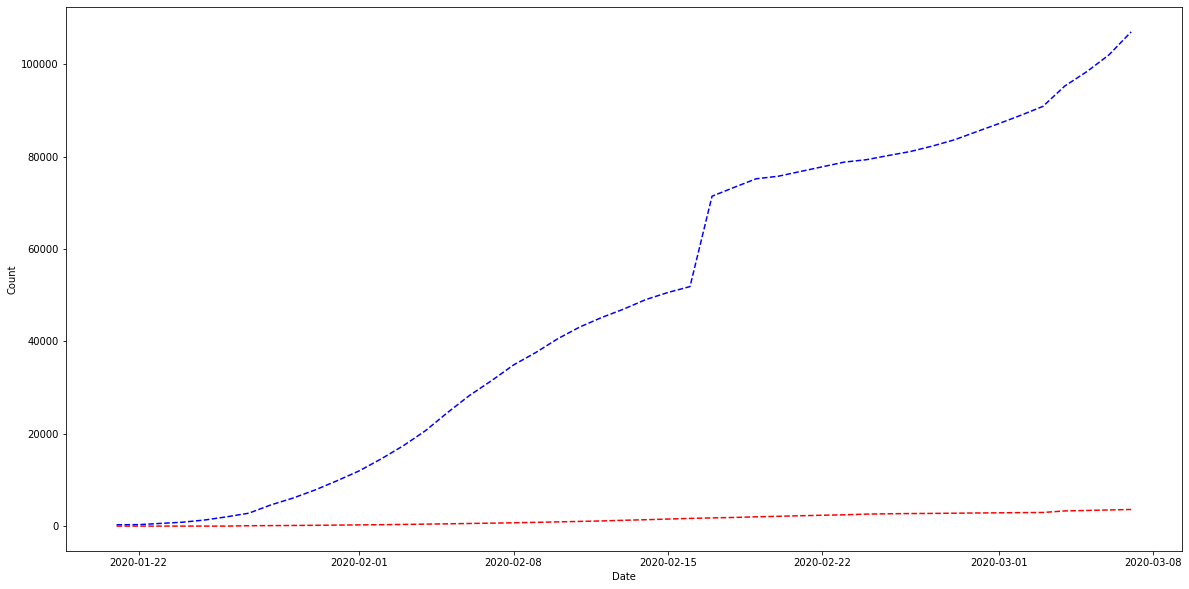

In [124]:
plt.figure(figsize=(20, 10))
plt.plot(df.Infected, 'b--')
plt.plot(df.Deaths, 'r--')
plt.ylabel("Count")
plt.xlabel("Date")
plt.show()

In [125]:
infected, deaths = csv_updater.get_nums()

In [126]:
import datetime
now = datetime.datetime.now()

In [127]:
currdate = now.strftime("%Y-%m-%d")

In [128]:
infected, deaths

(10773, 3661)

In [129]:
# currdate = '2020-03-06'
currdate = pd.to_datetime(currdate)

In [130]:
df.loc[currdate]= [infected, deaths]

In [131]:
df.tail(1)

,Infected,Deaths
Date,,
2020-03-08,10773.0,3661.0


In [132]:
if df.loc[currdate].any():
    print("Data already exists")    
else:
    df.loc[currdate] = [infected, deaths]

Data already exists


In [133]:
df.tail()

,Infected,Deaths
Date,,
2020-03-04,95310.0,3285.0
2020-03-05,98419.0,3387.0
2020-03-06,102044.0,3494.0
2020-03-07,106999.0,3599.0
2020-03-08,10773.0,3661.0


In [134]:
df.loc['2020-03-04'] = [95310,3285]

In [135]:
df.loc['2020-03-05'] = [98414,3387]

In [136]:
# df.drop(['2020-03-04','2020-03-05'], inplace=True)

### Exporting the well structured data

In [137]:
df.to_csv("StructuredDataset.csv")

In [138]:
df = pd.read_csv("StructuredDataset.csv")

In [139]:
df.set_index('Date', inplace = True)

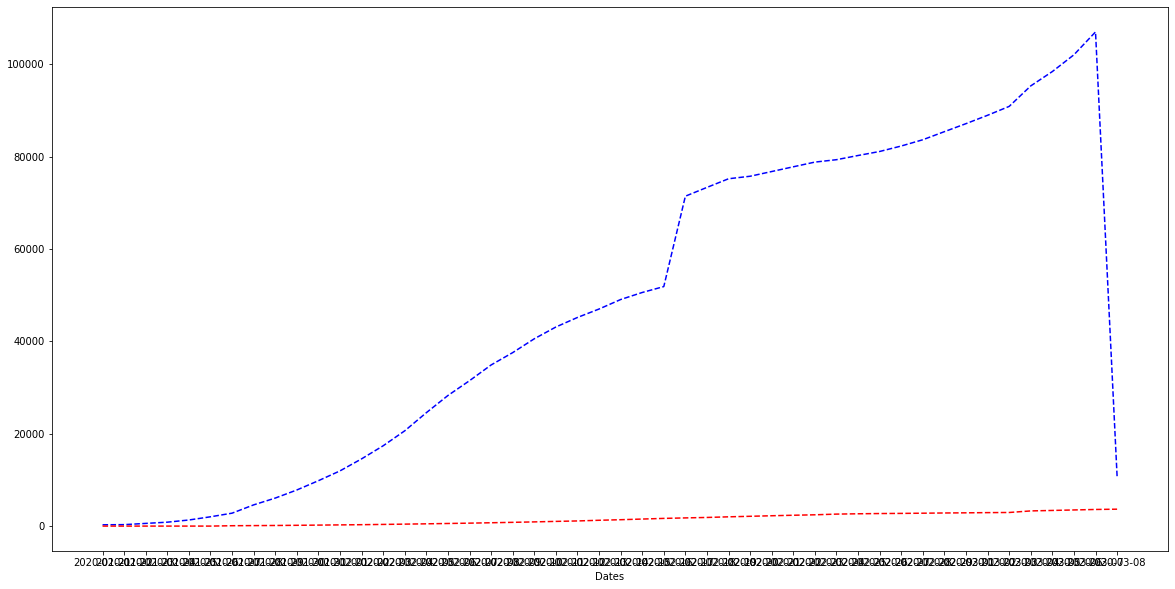

In [140]:
plt.figure(figsize=(20,10))
plt.plot(df.Infected, 'b--')
plt.plot(df.Deaths, 'r--')
plt.xlabel('Dates')
plt.show()

## LSTM

In [141]:
df

,Infected,Deaths
Date,,
2020-01-21,282.0,0.0
2020-01-22,314.0,0.0
2020-01-23,581.0,0.0
2020-01-24,846.0,0.0
2020-01-25,1320.0,0.0
2020-01-26,2014.0,0.0
2020-01-27,2798.0,80.0
2020-01-28,4593.0,106.0
2020-01-29,6065.0,132.0
